Notebook:
- rework of my previosu cleaning but without loading into flosp.

# import dep and data 

In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import flosp
#import bradlib as bl
#sns.set()

# Import and merge ward df with fce info

import fce data

In [2]:
fce = pd.read_csv('./../../../../3_Data/EDclassification/WAC_UHS_FCETable1_0918_rr_BK.txt',low_memory=False,error_bad_lines=False,warn_bad_lines=False)

In [3]:
ward = pd.read_csv('./../../../../3_Data/EDclassification/WAC_UHS_FCETable2_0918_rr.txt',low_memory=False,error_bad_lines=False,warn_bad_lines=False)

In [4]:
fce.shape

(1735487, 24)

In [5]:
ward.shape

(2115617, 5)

### clean col names

In [6]:
from flosp.basic_tools import tidy_column_heads

In [7]:
fce = tidy_column_heads(fce)
ward = tidy_column_heads(ward)

In [8]:
fce.shape

(1735487, 24)

In [9]:
fce['spell_number'].unique().shape

(1372415,)

In [10]:
ward['spell_number'].unique().shape

(1372283,)

lines = sum(1 for line in open('./../../../3_Data/WAC_UHS_FCETable1_0918_rr_BK.txt'))

lines

df.shape

df['Spell Number'].unique().shape

import ward table

df2 = pd.read_csv('./../../../3_Data/WAC_UHS_FCETable2_0918.txt',error_bad_lines=False,warn_bad_lines=False)

df3 = df[df.duplicated(['Spell Number'])]

df2.head()

df2['Spell Number'].unique().shape

df2.shape

# merge fce and ward tables

In [11]:
fce.head()

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_destination_desc,consultant_episode_number,episode_start_date,episode_end_date,specialty_code,specialty_description,consultant_code,main_specialty_code,length_of_episode_days,date_of_death
0,508656089369,10,1,8673622,18-JUN-09 13:15,18-JUN-09 18:00,21,EMERGENCY A+E,0,19,...,USUAL PLACE OF RESIDENCE,1,18-JUN-09 13:15,18-JUN-09 18:00,420,Paediatrics,1240,420,0.0,04-MAR-12 00:00
1,368636689369,0,2,8672974,18-JUN-09 04:03,19-JUN-09 11:49,82,BABIES BORN IN THIS UNIT,1,79,...,USUAL PLACE OF RESIDENCE,1,18-JUN-09 04:03,19-JUN-09 11:49,424,Well Babies,1463,502,1.0,NaN
2,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,...,USUAL PLACE OF RESIDENCE,2,03-JUN-09 13:15,03-JUN-09 13:15,300,General Medicine,1443,300,0.0,NaN
3,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,...,USUAL PLACE OF RESIDENCE,4,04-JUN-09 09:10,04-JUN-09 10:30,306,Hepatology,490,300,0.0,NaN
4,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,...,USUAL PLACE OF RESIDENCE,3,03-JUN-09 13:35,03-JUN-09 13:35,100,General Surgery,1378,100,0.0,NaN


In [12]:
fce.columns

Index(['pseudo_patient_number', 'age_at__admission', 'gender', 'spell_number',
       'admission_date', 'discharge_date', 'admission_method_code',
       'admission_method_description', 'length_of_stay_days',
       'admission_source_code', 'admission_source_description',
       'discharge_method_code', 'discharge_method_description',
       'discharge_destination_code', 'discharge_destination_desc',
       'consultant_episode_number', 'episode_start_date', 'episode_end_date',
       'specialty_code', 'specialty_description', 'consultant_code',
       'main_specialty_code', 'length_of_episode_days', 'date_of_death'],
      dtype='object')

In [13]:
drop_col = ['consultant_episode_number','episode_start_date','episode_end_date','specialty_code','specialty_description','consultant_code',
           'main_specialty_code','length_of_episode_days']
# drop_col = ['Consultant Episode Number','Episode Start Date','Episode End Date','Specialty Code','Specialty Description',
#             'Consultant Code','Main Specialty Code','Length of Episode (Days)']

In [14]:
fce = fce.drop(drop_col, axis=1)

In [15]:
fce.shape

(1735487, 16)

In [16]:
fce.drop_duplicates(inplace=True)

In [17]:
fce.shape

(1372415, 16)

merge FCE spell list(df)  with ward list (df2)

In [18]:
dff = fce.merge(ward,on='spell_number',how='inner')

In [19]:
ward2 = dff

In [20]:
ward2.shape

(2115615, 20)

checks

In [21]:
ward.head()

,spell_number,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date
0,8670648,1146,AMU ADMISSIONS 2,15/06/2009 04:00:00,16/06/2009 11:34:02
1,8670648,1145,AMU ADMISSIONS 1,16/06/2009 11:34:02,17/06/2009 22:00:02
2,8670648,151,D8 KENNETT,17/06/2009 22:00:02,24/06/2009 10:59:00
3,8670696,129,G3 PAEDIATRICS,22/06/2009 08:00:00,23/06/2009 09:46:00
4,8670732,1169,D3H HAMILTON FAIRLEY,15/06/2009 09:00:00,19/06/2009 14:32:00


In [22]:
ward[ward['spell_number'] == 8663608]

,spell_number,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date
14328,8663608,168,MEDICAL ENDOSCOPY UNIT E LEVEL,02/06/2009 12:45:00,02/06/2009 13:41:02
14329,8663608,118,E5 UPPER GI,02/06/2009 13:41:02,03/06/2009 13:15:02
14330,8663608,168,MEDICAL ENDOSCOPY UNIT E LEVEL,03/06/2009 13:15:02,03/06/2009 13:35:02
14331,8663608,118,E5 UPPER GI,03/06/2009 13:35:02,04/06/2009 10:31:00


In [23]:
ward[ward['spell_number'] == 8663608]

,spell_number,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date
14328,8663608,168,MEDICAL ENDOSCOPY UNIT E LEVEL,02/06/2009 12:45:00,02/06/2009 13:41:02
14329,8663608,118,E5 UPPER GI,02/06/2009 13:41:02,03/06/2009 13:15:02
14330,8663608,168,MEDICAL ENDOSCOPY UNIT E LEVEL,03/06/2009 13:15:02,03/06/2009 13:35:02
14331,8663608,118,E5 UPPER GI,03/06/2009 13:35:02,04/06/2009 10:31:00


In [24]:
ward2[ward2['spell_number'] == 8663608]

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,admission_source_description,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date
3,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,USUAL RESIDENCE INCL NFA,2.0,DISCHARGE BY SELF OR RELATIVE,19.0,USUAL PLACE OF RESIDENCE,NaN,168,MEDICAL ENDOSCOPY UNIT E LEVEL,02/06/2009 12:45:00,02/06/2009 13:41:02
4,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,USUAL RESIDENCE INCL NFA,2.0,DISCHARGE BY SELF OR RELATIVE,19.0,USUAL PLACE OF RESIDENCE,NaN,118,E5 UPPER GI,02/06/2009 13:41:02,03/06/2009 13:15:02
5,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,USUAL RESIDENCE INCL NFA,2.0,DISCHARGE BY SELF OR RELATIVE,19.0,USUAL PLACE OF RESIDENCE,NaN,168,MEDICAL ENDOSCOPY UNIT E LEVEL,03/06/2009 13:15:02,03/06/2009 13:35:02
6,518050189349,41,1,8663608,02-JUN-09 12:45,04-JUN-09 10:30,21,EMERGENCY A+E,2,19,USUAL RESIDENCE INCL NFA,2.0,DISCHARGE BY SELF OR RELATIVE,19.0,USUAL PLACE OF RESIDENCE,NaN,118,E5 UPPER GI,03/06/2009 13:35:02,04/06/2009 10:31:00


make ward move no.

In [25]:
ward2.sort_values(['spell_number','ward_stay_start_date'],inplace=True)

ward2['LOCATION_NUMBER'] = 1
ward2['LOCATION_NUMBER'] = ward2.groupby('spell_number')['LOCATION_NUMBER'].cumsum()

In [26]:
ward2.head()

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
16804,353232538008,79,2,6222150,29-APR-09 14:19,29-APR-09 15:08,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,29/04/2009 14:19:00,29/04/2009 15:08:00,1
74439,352434524354,24,2,6279602,20-AUG-09 23:00,21-AUG-09 02:00,31,MATERNITY ANTE PARTUM,1,19,...,1.0,ON MEDICAL ADVICE,51.0,OTHER-GEN.WARD/YOUNG PHYS.DIS.,NaN,1269,DELIVERY SUITE,20/08/2009 23:00:00,21/08/2009 02:01:00,1
5238,302434022192,55,2,6635911,14-APR-09 09:00,15-APR-09 16:30,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,14/04/2009 09:00:00,15/04/2009 09:44:00,1
5237,302434022192,55,2,6635911,14-APR-09 09:00,15-APR-09 16:30,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,168,MEDICAL ENDOSCOPY UNIT E LEVEL,15/04/2009 09:44:00,15/04/2009 11:29:00,2
5236,302434022192,55,2,6635911,14-APR-09 09:00,15-APR-09 16:30,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,15/04/2009 11:29:00,15/04/2009 16:30:00,3


# cleaning

# tidy datetime columns

Some datetime columns are fine. Conver these now.

In [27]:
ward2.query("date_of_death == ' '").head()

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
1264585,770878705055,55,1,1700700541,31-MAR-15 12:58,02-APR-15 17:00,22,EMERGENCY GP,2,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,,117,WARD E4,01/04/2015 20:05:00,02/04/2015 17:00:00,1
1264583,770878705055,55,1,1700700541,31-MAR-15 12:58,02-APR-15 17:00,22,EMERGENCY GP,2,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,,1429,GP ASSESSMENT AMU,31/03/2015 12:58:00,31/03/2015 18:09:00,2
1264584,770878705055,55,1,1700700541,31-MAR-15 12:58,02-APR-15 17:00,22,EMERGENCY GP,2,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,,13,CORONARY CARE UNIT,31/03/2015 18:09:00,01/04/2015 20:05:00,3
1264985,692161923303,74,1,1700700649,31-MAR-15 01:55,31-MAR-15 09:45,21,EMERGENCY A+E,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,,1146,AMU ADMISSIONS 2,31/03/2015 01:55:00,31/03/2015 09:45:00,1
1264717,213424135045,76,2,1700700662,31-MAR-15 01:45,24-APR-15 20:10,21,EMERGENCY A+E,24,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,,1178,D4 VASCULAR,01/04/2015 04:58:00,09/04/2015 16:40:00,1


In [28]:
dt_cols = ['admission_date','discharge_date'] #,'date_of_death']

for i in dt_cols:
    ward2[i] = pd.to_datetime(ward2[i], format= '%d-%b-%y %H:%M')

Some missing values in date of death column... ' '.

In [29]:
ward2.loc[ward2[ward2.date_of_death == ' '].index, 'date_of_death'] = np.nan

######## error wiht below: ValueError: time data ' ' does not match format '%d-%b-%y %H:%M' (match), so left now.

dt_cols = ['date_of_death']

for i in dt_cols:
    ward2[i] =  pd.to_datetime(ward2[ward2.notnull()][i], format= '%d-%b-%y %H:%M')

#### Clean up dates as there are differences within columns (at beginning and end of df)

25-AUG-17 13:44

18/06/2009 13:15:00

In [30]:
ward2.head(5)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
16804,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,29/04/2009 14:19:00,29/04/2009 15:08:00,1
74439,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,1.0,ON MEDICAL ADVICE,51.0,OTHER-GEN.WARD/YOUNG PHYS.DIS.,NaN,1269,DELIVERY SUITE,20/08/2009 23:00:00,21/08/2009 02:01:00,1
5238,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,14/04/2009 09:00:00,15/04/2009 09:44:00,1
5237,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,168,MEDICAL ENDOSCOPY UNIT E LEVEL,15/04/2009 09:44:00,15/04/2009 11:29:00,2
5236,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,15/04/2009 11:29:00,15/04/2009 16:30:00,3


In [31]:
ward2.tail(5)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
2087274,219727190080,36,2,1701306273,2018-09-20 13:00:00,2018-09-20 16:35:00,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1112,C3 HAMWIC D/C UNIT,20-SEP-18 13:00,20-SEP-18 16:35,1
2088112,794171940390,61,2,1701306275,2018-09-19 13:00:00,2018-09-19 14:30:00,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1112,C3 HAMWIC D/C UNIT,19-SEP-18 13:00,19-SEP-18 14:30,1
2086074,222828226756,17,2,1701306418,2018-09-24 10:00:00,2018-09-24 11:00:00,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1417,VICTORIA HOUSE INFUSION UNIT,24-SEP-18 10:00,24-SEP-18 11:00,1
2090902,044202449789,0,1,1701306873,2018-09-27 11:10:00,2018-09-28 14:30:00,2D,OTHER EMERGENCY ADMISSION,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1294,BABY DELIVERY WD,27-SEP-18 11:10,27-SEP-18 14:24,1
2090903,044202449789,0,1,1701306873,2018-09-27 11:10:00,2018-09-28 14:30:00,2D,OTHER EMERGENCY ADMISSION,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1242,BURLEY BABY B,27-SEP-18 14:24,28-SEP-18 14:30,2


In [32]:
months = {'JAN':'01',
          'FEB':'02',
         'MAR':'03',
         'APR':'04',
         'MAY':'05',
         'JUN':'06',
         'JUL':'07',
         'AUG':'08',
         'SEP':'09',
         'OCT':'10',
         'NOV':'11',
         'DEC':'12'}

def f(x):
    if (x != 'nan') and (len(x) == 15):
        y_date,y_time = x.split(' ')
        y_date  = y_date.split('-')
        mon = months[y_date[1]]
        #z = '20' + '1'
        return(y_date[0] + '/' + mon +'/20' + y_date[2] + ' ' + y_time + ':00')
    elif (len(x) == 19):
        return(x)
    else:
        return('nan')

cols = [i for i in df.columns if ('time' in i)]

In [33]:
cols = ['ward_stay_start_date','ward_stay_end_date'] #,'adm_datetime','dis_datetime']
for i in cols:
    ward2[i] = ward2[i].apply(lambda x : str(x)) # make strings
    ward2[i] = ward2[i].apply(f)

In [34]:
ward2.head(1)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
16804,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,29/04/2009 14:19:00,29/04/2009 15:08:00,1


In [35]:
ward2.tail(1)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_method_code,discharge_method_description,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER
2090903,044202449789,0,1,1701306873,2018-09-27 11:10:00,2018-09-28 14:30:00,2D,OTHER EMERGENCY ADMISSION,1,19,...,1.0,ON MEDICAL ADVICE,19.0,USUAL PLACE OF RESIDENCE,NaN,1242,BURLEY BABY B,27/09/2018 14:24:00,28/09/2018 14:30:00,2


In [36]:
# dt_cols = ['admission_date','discharge_date'] #,'date_of_death']

for i in cols:
    ward2[i] = pd.to_datetime(ward2[i], format= '%d/%m/%Y %H:%M:%S')

##### check df sizes

In [37]:
fce.shape

(1372415, 16)

In [38]:
fce.shape

(1372415, 16)

In [39]:
ward2.shape

(2115615, 21)

Confirmed that have not lost any records until now

#### Clean baby births

In [40]:
ward2.shape

(2115615, 21)

In [41]:
ward2 = ward2.query("admission_method_code not in ['82','83','2C']")
ward2.shape

(1997427, 21)

#### make simple admission method

In [42]:
ward2['ADM_METHOD_simple'] = 'other'

query = ward2.query("admission_method_code in ['21','2A']")
ward2.loc[query.index,'ADM_METHOD_simple'] = 'ED'

query = ward2.query("admission_method_code in ['31','32']")
ward2.loc[query.index,'ADM_METHOD_simple'] = 'Maternity'

query = ward2.query("admission_method_code in ['22']")
ward2.loc[query.index,'ADM_METHOD_simple'] = 'GP'

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
ward2.ADM_METHOD_simple.value_counts()

other        1059008
ED            584023
GP            197498
Maternity     156898
Name: ADM_METHOD_simple, dtype: int64

#### make simple admission type

In [44]:
ward2['ADM_TYPE'] = 'Non-Elective'

query = ward2.query('admission_method_code in ["11","12","13"]')
ward2.loc[query.index,'ADM_TYPE'] = 'Elective'

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
ward2.columns

Index(['pseudo_patient_number', 'age_at__admission', 'gender', 'spell_number',
       'admission_date', 'discharge_date', 'admission_method_code',
       'admission_method_description', 'length_of_stay_days',
       'admission_source_code', 'admission_source_description',
       'discharge_method_code', 'discharge_method_description',
       'discharge_destination_code', 'discharge_destination_desc',
       'date_of_death', 'ward_code', 'ward_code_description',
       'ward_stay_start_date', 'ward_stay_end_date', 'LOCATION_NUMBER',
       'ADM_METHOD_simple', 'ADM_TYPE'],
      dtype='object')

In [46]:
daycase_query = ward2[ward2.apply(lambda x : x.admission_date.date() == x.discharge_date.date(),axis=1)].index


In [47]:
ward2.loc[daycase_query,'ADM_TYPE'] = 'Day Case'

In [48]:
ward2.ADM_TYPE.value_counts()

Non-Elective    928558
Day Case        752740
Elective        316129
Name: ADM_TYPE, dtype: int64

#### make flags

- ITU admission/ITU visit?

ward2.isnull().sum()

### clean and tidy

In [54]:
for i in ward2.columns:
    print(i)

pseudo_patient_number
age_at__admission
gender
spell_number
admission_date
discharge_date
admission_method_code
admission_method_description
length_of_stay_days
admission_source_code
admission_source_description
discharge_method_code
discharge_method_description
discharge_destination_code
discharge_destination_desc
date_of_death
ward_code
ward_code_description
ward_stay_start_date
ward_stay_end_date
LOCATION_NUMBER
ADM_METHOD_simple
ADM_TYPE


In [55]:
col_renames = {
    'ADM_TYPE':'admission_type',
    'age_at__admission':'age',
    'admission_date':'adm_datetime',
    'discharge_date':'dis_datetime',
    
}

ward2.rename(columns=col_renames, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [57]:
ward2.head()

,pseudo_patient_number,age,gender,spell_number,adm_datetime,dis_datetime,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_destination_code,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,ADM_METHOD_simple,admission_type
16804,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,19.0,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-29 14:19:00,2009-04-29 15:08:00,1,other,Day Case
74439,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,51.0,OTHER-GEN.WARD/YOUNG PHYS.DIS.,NaN,1269,DELIVERY SUITE,2009-08-20 23:00:00,2009-08-21 02:01:00,1,Maternity,Non-Elective
5238,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,2009-04-14 09:00:00,2009-04-15 09:44:00,1,other,Elective
5237,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,19.0,USUAL PLACE OF RESIDENCE,NaN,168,MEDICAL ENDOSCOPY UNIT E LEVEL,2009-04-15 09:44:00,2009-04-15 11:29:00,2,other,Elective
5236,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,19.0,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,2009-04-15 11:29:00,2009-04-15 16:30:00,3,other,Elective


In [56]:
ward2.shape

(1997427, 23)

In [59]:
ward2.to_csv('./../../../../3_Data/EDclassification/cleanWARD.csv',index=False)

In [60]:
ward2.to_pickle('./../../../../3_Data/EDclassification/cleanWARD.pkl')

#### make spell df

In [61]:
ward2.columns

Index(['pseudo_patient_number', 'age', 'gender', 'spell_number',
       'adm_datetime', 'dis_datetime', 'admission_method_code',
       'admission_method_description', 'length_of_stay_days',
       'admission_source_code', 'admission_source_description',
       'discharge_method_code', 'discharge_method_description',
       'discharge_destination_code', 'discharge_destination_desc',
       'date_of_death', 'ward_code', 'ward_code_description',
       'ward_stay_start_date', 'ward_stay_end_date', 'LOCATION_NUMBER',
       'ADM_METHOD_simple', 'admission_type'],
      dtype='object')

In [62]:
move_count = pd.DataFrame(ward2.groupby('spell_number').count()['pseudo_patient_number']).rename(columns={'pseudo_patient_number':'ward_moves'})


In [63]:
move_count.head(2)

,ward_moves
spell_number,
6222150,1
6279602,1


In [64]:
len(ward2.spell_number.unique())

1315333

In [65]:
spell = ward2[ward2.LOCATION_NUMBER == 1]
spell.shape

(1315333, 23)

In [66]:
spell = spell.merge(move_count,on='spell_number')

 save spell out

In [67]:
spell.head()

,pseudo_patient_number,age,gender,spell_number,adm_datetime,dis_datetime,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,discharge_destination_desc,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,ADM_METHOD_simple,admission_type,ward_moves
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,USUAL PLACE OF RESIDENCE,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-29 14:19:00,2009-04-29 15:08:00,1,other,Day Case,1
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,OTHER-GEN.WARD/YOUNG PHYS.DIS.,NaN,1269,DELIVERY SUITE,2009-08-20 23:00:00,2009-08-21 02:01:00,1,Maternity,Non-Elective,1
2,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,1,19,...,USUAL PLACE OF RESIDENCE,NaN,1174,C7 MANAGED CARE,2009-04-14 09:00:00,2009-04-15 09:44:00,1,other,Elective,3
3,499343990070,80,1,6898128,2009-09-23 08:36:00,2009-09-23 12:19:00,13,ELECTIVE PLANNED,0,19,...,USUAL PLACE OF RESIDENCE,04-JUN-13 00:00,168,MEDICAL ENDOSCOPY UNIT E LEVEL,2009-09-23 08:36:00,2009-09-23 12:20:00,1,other,Day Case,1
4,522454229119,81,1,6949247,2009-04-27 09:00:00,2009-04-27 10:15:00,13,ELECTIVE PLANNED,0,19,...,USUAL PLACE OF RESIDENCE,08-JAN-10 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-27 09:00:00,2009-04-27 10:15:00,1,other,Day Case,1


In [83]:
spell.isnull().sum()

pseudo_patient_number                 0
age                                   0
gender                                0
spell_number                          0
adm_datetime                          0
dis_datetime                        604
admission_method_code                 0
admission_method_description          0
length_of_stay_days                   0
admission_source_code                 0
admission_source_description          0
discharge_method_code               605
discharge_method_description        605
discharge_destination_code          604
discharge_destination_desc          604
date_of_death                   1080563
ward_code                             0
ward_code_description                 0
ward_stay_start_date                  0
ward_stay_end_date                  237
LOCATION_NUMBER                       0
ADM_METHOD_simple                     0
admission_type                        0
ward_moves                            0
dtype: int64

In [78]:
spell.shape

(1315333, 24)

In [81]:
spell.dropna(axis=0, subset=['adm_datetime'], inplace=True)

In [82]:
spell.shape

(1315330, 24)

In [84]:
spell.to_csv('./../../../../3_Data/EDclassification/cleanSPELL.csv',index=False)

In [85]:
spell.to_pickle('./../../../../3_Data/EDclassification/cleanSPELL.pkl')

In [133]:
break

SyntaxError: 'break' outside loop (<ipython-input-133-6aaf1f276005>, line 1)

In [77]:
df.head()

,hosp_patid,age,gender,spell_no,adm_datetime,dis_datetime,admission_method,admission_method_code,move_start_datetime,move_end_datetime,...,dis_day,dis_month,dis_week,dis_dayofweek_name,dis_year,dis_date,dis_flag_wkend,move_no,site,admission_type
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,2009-04-29 14:19:00,2009-04-29 15:08:00,...,29.0,4.0,18.0,Wednesday,2009.0,2009-04-29,0,1,SGH,Day Case
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,2009-08-20 23:00:00,2009-08-21 02:01:00,...,21.0,8.0,34.0,Friday,2009.0,2009-08-21,0,1,SGH,Non-Elective
2,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-14 09:00:00,2009-04-15 09:44:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,1,SGH,Elective
3,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-15 09:44:00,2009-04-15 11:29:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,2,SGH,Elective
4,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-15 11:29:00,2009-04-15 16:30:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,3,SGH,Elective


In [78]:
df.columns

Index(['hosp_patid', 'age', 'gender', 'spell_no', 'adm_datetime',
       'dis_datetime', 'admission_method', 'admission_method_code',
       'move_start_datetime', 'move_end_datetime', 'move_name_code',
       'move_name', 'spel_los', 'dis_destination', 'dis_method',
       'date_of_death', 'adm_source_code', 'adm_source_desc', 'age_group',
       'adm_hour', 'adm_dayofweek', 'adm_day', 'adm_month', 'adm_week',
       'adm_dayofweek_name', 'adm_year', 'adm_date', 'adm_flag_wkend',
       'dis_hour', 'dis_dayofweek', 'dis_day', 'dis_month', 'dis_week',
       'dis_dayofweek_name', 'dis_year', 'dis_date', 'dis_flag_wkend',
       'move_no', 'site', 'admission_type'],
      dtype='object')

In [79]:
ip._dataRAW.columns

Index(['hosp_patid', 'age', 'gender', 'spell_no', 'adm_datetime',
       'dis_datetime', 'admission_method', 'admission_method_code',
       'move_start_datetime', 'move_end_datetime', 'move_name_code',
       'move_name', 'spel_los', 'dis_destination', 'dis_method',
       'date_of_death', 'adm_source_code', 'adm_source_desc', 'age_group',
       'adm_hour', 'adm_dayofweek', 'adm_day', 'adm_month', 'adm_week',
       'adm_dayofweek_name', 'adm_year', 'adm_date', 'adm_flag_wkend',
       'dis_hour', 'dis_dayofweek', 'dis_day', 'dis_month', 'dis_week',
       'dis_dayofweek_name', 'dis_year', 'dis_date', 'dis_flag_wkend',
       'move_no', 'site', 'admission_type'],
      dtype='object')

In [80]:
ip._dataRAW.head()

,hosp_patid,age,gender,spell_no,adm_datetime,dis_datetime,admission_method,admission_method_code,move_start_datetime,move_end_datetime,...,dis_day,dis_month,dis_week,dis_dayofweek_name,dis_year,dis_date,dis_flag_wkend,move_no,site,admission_type
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,2009-04-29 14:19:00,2009-04-29 15:08:00,...,29.0,4.0,18.0,Wednesday,2009.0,2009-04-29,0,1,SGH,Day Case
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,2009-08-20 23:00:00,2009-08-21 02:01:00,...,21.0,8.0,34.0,Friday,2009.0,2009-08-21,0,1,SGH,Non-Elective
2,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-14 09:00:00,2009-04-15 09:44:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,1,SGH,Elective
3,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-15 09:44:00,2009-04-15 11:29:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,2,SGH,Elective
4,302434022192,55,2,6635911,2009-04-14 09:00:00,2009-04-15 16:30:00,13,ELECTIVE PLANNED,2009-04-15 11:29:00,2009-04-15 16:30:00,...,15.0,4.0,16.0,Wednesday,2009.0,2009-04-15,0,3,SGH,Elective


In [81]:
ip.create_spell_df()

----------------------------------------
Creating spell dataframe...could take 10minutes or more depending on size of data set.


In [82]:
df.columns

Index(['hosp_patid', 'age', 'gender', 'spell_no', 'adm_datetime',
       'dis_datetime', 'admission_method', 'admission_method_code',
       'move_start_datetime', 'move_end_datetime', 'move_name_code',
       'move_name', 'spel_los', 'dis_destination', 'dis_method',
       'date_of_death', 'adm_source_code', 'adm_source_desc', 'age_group',
       'adm_hour', 'adm_dayofweek', 'adm_day', 'adm_month', 'adm_week',
       'adm_dayofweek_name', 'adm_year', 'adm_date', 'adm_flag_wkend',
       'dis_hour', 'dis_dayofweek', 'dis_day', 'dis_month', 'dis_week',
       'dis_dayofweek_name', 'dis_year', 'dis_date', 'dis_flag_wkend',
       'move_no', 'site', 'admission_type'],
      dtype='object')

In [83]:
ip._dataRAWspell.shape

(1317222, 34)

In [84]:
ip._dataRAW.shape

(2036456, 40)

## Save out

to do:
- count for moves
- basic vis: numbers 

In [85]:
ip.saveRAWasCLEAN()

----------------------------------------
saved file: ./../../3_Data/processed/sgh/sghIPward.pkl
----------------------------------------
saved file: ./../../3_Data/processed/sgh/sghIPspell.pkl


In [81]:
break

SyntaxError: 'break' outside loop (<ipython-input-81-6aaf1f276005>, line 1)

# make timeseries dfs

In [86]:
sgh = flosp.analyse('sgh','./../../3_Data/',[2017])

----------------------------------------
attemping to import processed dataframes.
Found: ./../../3_Data/processed/sgh/sghED.pkl
Missing: ./../../3_Data/processed/sgh/sghIPfce.pkl
Found: ./../../3_Data/processed/sgh/sghIPward.pkl
Found: ./../../3_Data/processed/sgh/sghIPspell.pkl
Found: ./../../3_Data/processed/sgh/sghHOURLY.pkl
Found: ./../../3_Data/processed/sgh/sghDAILY.pkl


sgh.data.ED = sgh.data.ED[-400:-300]

sgh.data.IPspell = sgh.data.IPspell[-400:-300]

In [87]:
sgh.data.IPspell.head()

,hosp_patid,adm_datetime,move_total,adm_loc,dis_loc,admission_method,admission_type,spel_los,gender,site,...,dis_month,dis_week,dis_dayofweek_name,dis_year,dis_datetime,dis_destination,dis_method,dis_day,dis_date,dis_flag_wkend
0,90,2011-09-13 00:12:00,2,CLINICAL DECISIONS UNIT AE,2,21,Non-Elective,7,2,SGH,...,9.0,38.0,Tuesday,2011.0,2011-09-20 20:00:00,19.0,1.0,20.0,2011-09-20,0
1,90,2011-09-30 13:42:00,1,CLINICAL DECISIONS UNIT AE,1,21,Day Case,0,2,SGH,...,9.0,39.0,Friday,2011.0,2011-09-30 17:44:00,19.0,1.0,30.0,2011-09-30,0
2,90,2012-11-21 09:28:00,1,WARD F3,1,21,Non-Elective,8,2,SGH,...,11.0,48.0,Thursday,2012.0,2012-11-29 15:00:00,51.0,1.0,29.0,2012-11-29,0
3,90,2013-12-12 10:00:00,1,MEDICAL ENDOSCOPY UNIT E LEVEL,1,11,Day Case,0,2,SGH,...,12.0,50.0,Thursday,2013.0,2013-12-12 13:15:00,19.0,1.0,12.0,2013-12-12,0
4,90,2014-07-20 14:32:00,1,CLINICAL DECISIONS UNIT AE,1,21,Day Case,0,2,SGH,...,7.0,29.0,Sunday,2014.0,2014-07-20 16:45:00,19.0,1.0,20.0,2014-07-20,1


In [88]:
sgh.data.IPspell.adm_datetime.max()

Timestamp('2018-09-02 20:00:00')

In [89]:
sgh.data.IPspell.adm_datetime.min()

Timestamp('2009-04-01 00:05:00')

dates really do start back then...look like it may be complete.

In [90]:
sgh.data.IPspell.head().columns

Index(['hosp_patid', 'adm_datetime', 'move_total', 'adm_loc', 'dis_loc',
       'admission_method', 'admission_type', 'spel_los', 'gender', 'site',
       'age_group', 'age', 'adm_year', 'adm_month', 'adm_dayofweek',
       'adm_dayofweek_name', 'adm_flag_wkend', 'adm_hour', 'adm_day',
       'adm_week', 'adm_date', 'adm_flag_wkend', 'dis_hour', 'dis_dayofweek',
       'dis_month', 'dis_week', 'dis_dayofweek_name', 'dis_year',
       'dis_datetime', 'dis_destination', 'dis_method', 'dis_day', 'dis_date',
       'dis_flag_wkend'],
      dtype='object')

In [91]:
sgh.data.ED.head()

,dept_patid,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,...,waiting_time,arr_triage_wait,arr_dr_wait,arr_adm_req_wait,adm_req_dep_wait,dr_adm_req_wait,dr_dep_wait,breach_flag,breach_datetime,age_group
0,90902325901,004101045105,94.0,F,Main ED,2009-04-13 09:16:00,NaN,NaT,2009-04-13 10:28:00,NaT,...,188.0,NaN,72.0,NaN,NaN,NaN,116.0,0,2009-04-13 13:16:00,65+
1,90902326101,644868441371,47.0,M,Main ED,2009-04-13 09:22:00,NaN,NaT,2009-04-13 09:30:00,NaT,...,213.0,NaN,8.0,NaN,NaN,NaN,205.0,0,2009-04-13 13:22:00,18-64
2,90902326501,668666687357,0.0,M,Main ED,2009-04-13 09:31:00,NaN,NaT,2009-04-13 10:00:00,NaT,...,143.0,NaN,29.0,NaN,NaN,NaN,114.0,0,2009-04-13 13:31:00,0-17
3,90902328601,446747461391,4.0,M,Main ED,2009-04-13 10:52:00,NaN,NaT,2009-04-13 11:30:00,NaT,...,177.0,NaN,38.0,NaN,NaN,NaN,139.0,0,2009-04-13 14:52:00,0-17
4,90902328801,423646238168,31.0,F,Main ED,2009-04-13 11:18:00,NaN,NaT,2009-04-13 12:00:00,NaT,...,211.0,NaN,42.0,NaN,NaN,NaN,169.0,0,2009-04-13 15:18:00,18-64


In [92]:
sgh.data.ED.arrive_datetime.min()

Timestamp('2009-04-01 00:04:00')

In [93]:
sgh.data.ED.arrive_datetime.max()

Timestamp('2018-09-30 23:58:00')

In [94]:
start = pd.datetime(2015,9,1)
end = pd.datetime(2018,9,1)
start = pd.datetime(2009,4,1)

In [95]:
sgh.create_status_hourly(start,end)

start date: 2009-04-01 00:00:00
end date: 2018-09-01 00:00:00
Index(['NonElective', 'Day_Case', 'Elective'], dtype='object')
NonElective
Day_Case
Elective
----------------------------------------
Making callender columns from:  datetime
----------------------------------------
saved file: ./../../3_Data/processed/sgh/sghHOURLY.pkl


In [96]:
%matplotlib inline

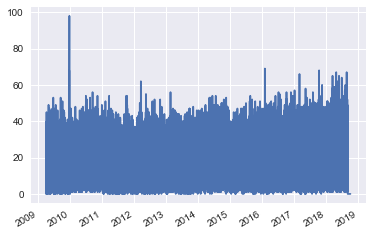

In [97]:
sgh.data.HOURLY['EDocc_nonadmit'].plot()

In [98]:
sgh.create_status_daily()

----------------------------------------
saved file: ./../../3_Data/processed/sgh/sghDAILY.pkl


In [99]:
sgh.data.HOURLY.head()

,EDocc_nonadmit,EDocc_admit,EDocc_total,EDocc_awaitingadm,EDocc_nonbreach,EDocc_breach,IPocc_NonElective,IPocc_Day_Case,IPocc_Elective,IPocc_total,...,datetime,dt_hour,dt_dayofweek,dt_day,dt_month,dt_week,dt_dayofweek_name,dt_year,dt_date,dt_flag_wkend
2009-04-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2009-04-01 00:00:00,0,2,1,4,14,Wednesday,2009,2009-04-01,0
2009-04-01 01:00:00,2.0,4.0,6.0,0.0,3.0,3.0,3.0,2.0,0.0,5.0,...,2009-04-01 01:00:00,1,2,1,4,14,Wednesday,2009,2009-04-01,0
2009-04-01 02:00:00,3.0,8.0,11.0,0.0,5.0,6.0,5.0,3.0,0.0,8.0,...,2009-04-01 02:00:00,2,2,1,4,14,Wednesday,2009,2009-04-01,0
2009-04-01 03:00:00,7.0,9.0,16.0,0.0,9.0,7.0,7.0,7.0,0.0,14.0,...,2009-04-01 03:00:00,3,2,1,4,14,Wednesday,2009,2009-04-01,0
2009-04-01 04:00:00,7.0,10.0,17.0,0.0,10.0,7.0,10.0,6.0,0.0,16.0,...,2009-04-01 04:00:00,4,2,1,4,14,Wednesday,2009,2009-04-01,0


In [100]:
sgh.data.HOURLY.columns

Index(['EDocc_nonadmit', 'EDocc_admit', 'EDocc_total', 'EDocc_awaitingadm',
       'EDocc_nonbreach', 'EDocc_breach', 'IPocc_NonElective',
       'IPocc_Day_Case', 'IPocc_Elective', 'IPocc_total', 'IPocc_elec_nonelec',
       'IPadm', 'IPadm_nonelec', 'IPadm_daycase', 'IPadm_elective', 'IPdis',
       'IPdis_nonelec', 'IPdis_daycase', 'IPdis_elective',
       'IPadm_elec_nonelec', 'IPdis_elec_nonelec', 'EDarrive',
       'EDarrive_breach', 'EDarrive_adm', 'EDdepart', 'EDdepart_breach',
       'EDdepart_adm', 'datetime', 'dt_hour', 'dt_dayofweek', 'dt_day',
       'dt_month', 'dt_week', 'dt_dayofweek_name', 'dt_year', 'dt_date',
       'dt_flag_wkend'],
      dtype='object')

In [101]:
sgh.data.DAILY.columns

Index(['dt_year', 'dt_month', 'dt_day', 'ED_attendances', 'ED_breaches',
       'ED_admissions', 'EDarrive', 'IPadm_elec_nonelec', 'IPdis_elec_nonelec',
       'IPocc_total_MEAN', 'IPocc_total_MAX', 'IPocc_elec_nonelec_MEAN',
       'IPocc_elec_nonelec_MAX', 'IPocc_elec_nonelec_LAST',
       'IPocc_NonElective_LAST', 'EDocc_total_MAX', 'EDocc_total_MEAN',
       'EDocc_total_LAST', 'EDocc_awaitingadm', 'EDocc_awaitingadm_LAST',
       'IPadm_minus_dis_elec_nonelec', 'IPdis_pre12_elec_nonelec'],
      dtype='object')

# Dev

In [102]:
break

SyntaxError: 'break' outside loop (<ipython-input-102-6aaf1f276005>, line 1)

In [ ]:
for i in df.head():
    print(df['move_end_datetime'].ix[i] - df['move_start_datetime'][i])

In [ ]:
pd.timedelta(days=1)

In [ ]:
round((df['move_end_datetime'] - df['move_start_datetime'])/pd.Timedelta(days=1)).head(20)

In [ ]:
df['move_los'].head(20)

In [ ]:
inpat = pd.read_csv('./../../3_Data/HH_IP_FLOW_Study.csv',low_memory=False)

In [ ]:
inpat.head(3)

In [ ]:
cols = []
for i in inpat.columns:
    if 'WARD' not in i:
        cols.append(i)
        print(i)

In [ ]:
cols

In [ ]:
inpat[cols].head(2)

In [ ]:
cols2 = ['ADMISSION_METHOD_DESCRIPTION','ADMISSION_TYPE','DISCHARGE_DESTINATION_DESCRIPTION','DISCHARGE_METHOD_DESTINATION']

for i in cols2:
    print(inpat[i].value_counts())

inpat[cols2]

In [ ]:
inpat[cols].describe()

In [ ]:
inpat['DISCHARGE_METHOD_DESTINATION'].value_counts()

In [ ]:
col_map = {
    'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
 'AGE_AT_ADMISSION':'age',
 'GENDER_NATIONAL_CODE_1':'gender',
 'SITE':'site',
 'ADMISSION_DTTM':'adm_datetime',
 'DISCHARGE_DTTM':'dis_datetime',
 'ADMISSION_METHOD_DESCRIPTION':'admission_method',
 'ADMISSION_TYPE':'admission_type',
 'EPISODE_NO':'epis_no',
 'EPISODE_START_DTTM':'epis_start_datetime',
 'EPISODE_END_DTTM':'epis_end_datetime',
 'SPECIALTY_DESCRIPTION':'epis_specialty',
 'EPISODE_LOS':'epis_los',
 'SPELL_LOS':'spel_los',
 'DISCHARGE_DESTINATION_NC':'dis_destination',
 'DISCHARGE_METHOD_DESTINATION':'dis_method'
}

In [ ]:
inpat = bl.dftools.pd_tidy_column_heads(inpat)

In [ ]:
inpat.head(2)

reduce for testing

In [ ]:
inpat = inpat[0:5000]

# Cleaning

In [ ]:
inpat.columns

make datetime col format

In [ ]:
datetime_cols = []
for i in inpat.columns:
    if ('dttm' in i): # or ('_end' in i):
        datetime_cols.append(i)

In [ ]:
datetime_cols

In [ ]:
for i in datetime_cols:
    inpat[i] = pd.to_datetime(inpat[i], format= '%d/%m/%Y %H:%M')

datetimes

In [ ]:
inpat[i].dtype

make arrival year etc?

# basics dataset

In [ ]:
inpat.admission_dttm.min()

In [ ]:
inpat.discharge_dttm.min()

# volumes/activity

- groupby year/admission method
- groupby year/age groups

- no of beds
- no of wards
- changges over time
- occupancy?
- 

# patient flow through wards

- isolate ward movements into 1 df
- look at individual years?
- proprtion of entry to wards
- proportion of exit wards
- number of ward moves

# outliers

- average no.s of ward moves
- 

# link between wards and ED data?

- look through analysis from pmth data and copy?

# patient group clustering

# Dev

In [ ]:
break